In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
grid = gpd.read_file('shapes/grid/grid_1km.shp')
data = gpd.read_file('shapes/arrivals/arrivals.shp')

In [3]:
data.head()

,date,geometry
0,2019-01-01 00:00:00,POINT (-85.75200 38.24200)
1,2019-01-01 01:00:00,POINT (-85.75800 38.25000)
2,2019-01-01 01:30:00,POINT (-85.74700 38.23200)
3,2019-01-01 02:30:00,POINT (-85.76600 38.23100)
4,2019-01-01 03:45:00,POINT (-85.76800 38.25600)


In [4]:
import numpy as np
import statsmodels.api as sm
latln = np.concatenate([data['geometry'].x.values[:, np.newaxis], data['geometry'].y.values[:, np.newaxis]], axis=1)
kde = sm.nonparametric.KDEMultivariate(latln, ['c', 'c'])

In [7]:
import pickle
from experiment import *
with open('data/sampling_methods_louisville.pickle', 'rb') as file:
    sampling = pickle.load(file)

In [78]:
sampling['spatial']['stkde'].bw_dict[0]

{'H': [[0.0010006372140866032, 0], [0, 0.0009311483967919619]],
 'L': array([[0.03163285, 0.        ],
        [0.        , 0.03051472]]),
 'det': 9.317417376671151e-07,
 'inv': array([[ 999.3631917 ,    0.        ],
        [   0.        , 1073.94267492]])}

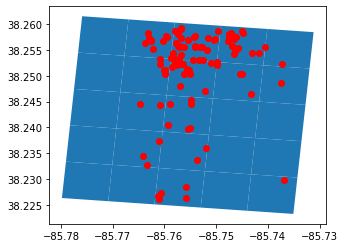

In [77]:
import matplotlib.pyplot as plt
grid = grid.to_crs(data.crs)
ax = grid.plot()
ax.scatter(x_sampled[:, 0], x_sampled[:, 1], c='red')


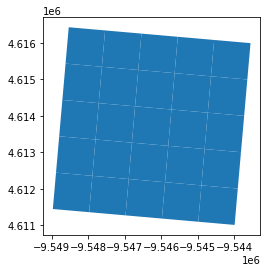

In [60]:
grid.plot()

In [80]:
1.06 * latln * latln.shape[0] ** (- 1. / (4 + latln.shape[1]))

array([[-11.67117855,   5.20488397],
       [-11.67199517,   5.2059728 ],
       [-11.67049803,   5.20352293],
       ...,
       [-11.6695453 ,   5.20665332],
       [-11.67172297,   5.20338683],
       [-11.6695453 ,   5.20665332]])

In [87]:
del kde
del sampling

In [83]:
from scipy.stats import gaussian_kde

In [89]:
kde = gaussian_kde(latln[:100])

LinAlgError: singular matrix

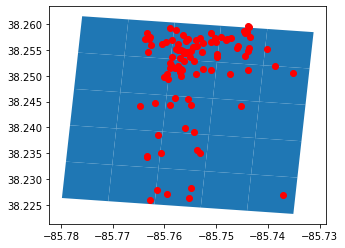

In [104]:
cov = np.cov(latln.T)
factor = latln.shape[0]**(-1./(latln.shape[1]+4))

L = np.linalg.cholesky(cov * factor ** 2)
z_i = np.random.standard_normal((100, 2))
x_sampled = np.concatenate([[np.dot(L, z_i[i]) + x_i[i]] for i in range(len(z_i))], axis=0)

ax = grid.plot()
ax.scatter(x_sampled[:, 0], x_sampled[:, 1], c='red')

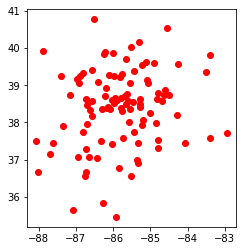

In [117]:
z = np.random.multivariate_normal([0, 0], cov=cov, size=(100))
x_sampled = np.concatenate([[ z_i[i] + x_i[i]] for i in range(len(z_i))], axis=0)
ax = grid.plot()
ax.scatter(x_sampled[:, 0], x_sampled[:, 1], c='red')

In [118]:
z

array([[ 8.65186059e-03,  8.96488094e-04],
       [ 4.17376736e-03,  1.16657333e-02],
       [ 9.18550543e-04,  2.95583842e-03],
       [-1.35250849e-03,  1.09224941e-02],
       [-1.15596545e-04,  1.33368138e-03],
       [ 1.23504951e-02, -9.20549761e-03],
       [-1.22161176e-02, -1.29591838e-03],
       [-3.67325044e-03, -1.37644828e-02],
       [-5.67040312e-03, -6.65084733e-03],
       [-2.31363457e-03,  2.53320458e-03],
       [-1.14265376e-02, -4.33248338e-03],
       [ 2.28882859e-03,  1.02309348e-02],
       [-1.38799944e-03,  1.14682690e-02],
       [ 2.26641508e-03,  8.26294813e-03],
       [-1.72130290e-03,  1.67107204e-03],
       [-4.35559399e-03, -1.41503518e-02],
       [-5.30473406e-03,  1.47440111e-03],
       [-1.08657938e-02, -1.09082968e-02],
       [-5.64413035e-03, -1.15187808e-03],
       [ 5.48773734e-03, -7.47461412e-03],
       [-8.94548046e-03,  1.03290030e-02],
       [-3.85443367e-03, -8.92261194e-03],
       [ 3.03426583e-04,  1.28355794e-02],
       [ 8.